In [1]:
import seaborn as sb
from pandas import DataFrame, read_csv, get_dummies

In [ ]:
dataset: DataFrame = read_csv("./data/titanic.csv")

## Data cleaning

In [17]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [18]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

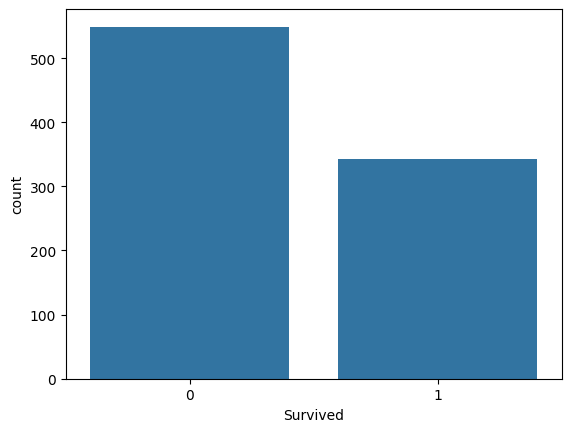

In [7]:
sb.countplot(x="Survived", data=dataset)

<Axes: xlabel='Survived', ylabel='count'>

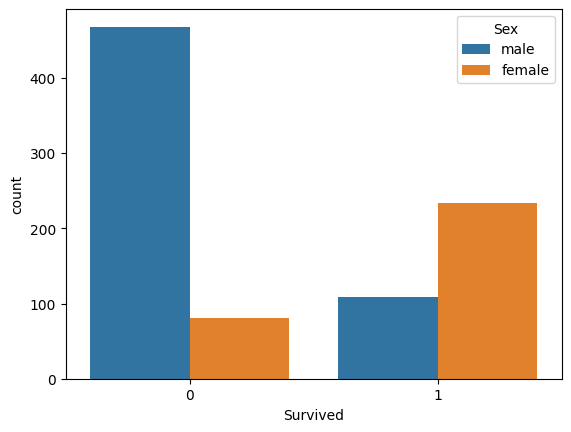

In [8]:
sb.countplot(x="Survived", data=dataset, hue="Sex")

In [5]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

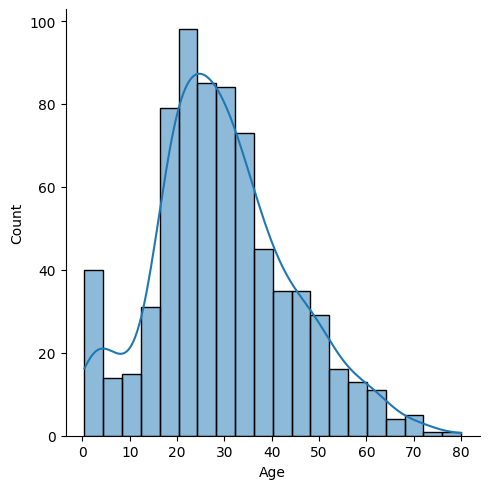

In [13]:
sb.displot(x="Age", data=dataset, kde=True)

In [12]:
print(dataset["Age"].mean())
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())
print(dataset.isna().sum())

29.69911764705882
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
dataset = dataset.drop(columns=["Cabin", "PassengerId", "Name", "Ticket"], axis=1)

In [14]:
print(dataset["Embarked"].value_counts())
dataset = dataset.dropna()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [15]:
sex_dummies = get_dummies(dataset["Sex"], drop_first=True)
dataset = dataset.join(sex_dummies)
dataset = dataset.drop(columns=["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

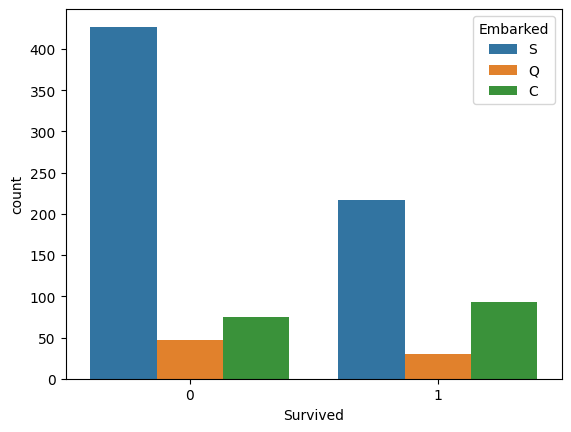

In [54]:
sb.countplot(x="Survived", data=dataset, hue="Embarked")

In [16]:
embarked_dummies = get_dummies(dataset["Embarked"], drop_first=True)
dataset = dataset.join(embarked_dummies)
dataset = dataset.drop(columns=["Embarked"], axis=1)

<Axes: >

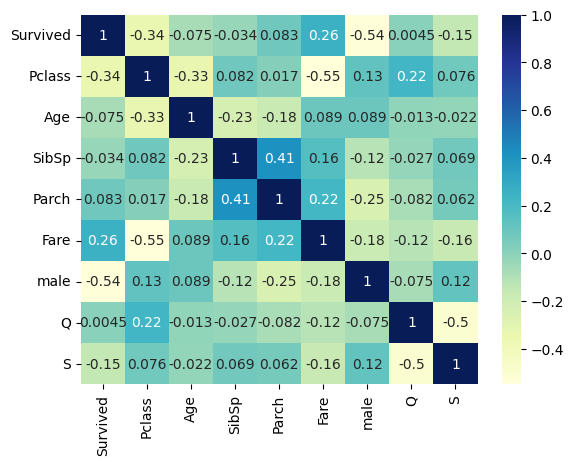

In [57]:
sb.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

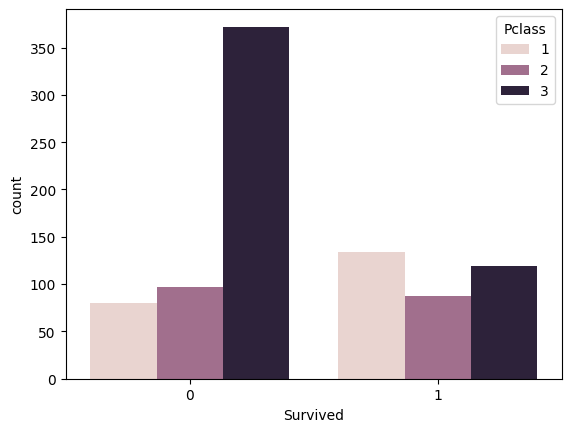

In [58]:
sb.countplot(x="Survived", data=dataset, hue="Pclass")

## Training

In [37]:
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
x = dataset.drop(columns=["Survived"], axis=1)
y = dataset["Survived"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
model = DecisionTreeClassifier(max_depth=50)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [23]:
accuracy_score(y_test, predictions)

0.8033707865168539

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.77      0.76      0.77        75

    accuracy                           0.80       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.80      0.80      0.80       178



In [73]:
predictions_df = DataFrame(
	confusion_matrix(y_test, predictions),
	columns=["Predicted No", "Predicted Yes"],
	index=["Actual No", "Actual Yes"]
)
predictions_df

,Predicted No,Predicted Yes
Actual No,96,21
Actual Yes,16,45


In [27]:
results: list = []

for i in range(1, 15):
	model = DecisionTreeClassifier(max_depth=i)
	model.fit(x_train, y_train)
	predictions = model.predict(x_test)
	accuracy = accuracy_score(y_test, predictions)
	print(f"Max Depth: {i} - Accuracy: {accuracy}")
	results.append(accuracy)

Max Depth: 1 - Accuracy: 0.797752808988764
Max Depth: 2 - Accuracy: 0.7359550561797753
Max Depth: 3 - Accuracy: 0.8202247191011236
Max Depth: 4 - Accuracy: 0.8089887640449438
Max Depth: 5 - Accuracy: 0.8089887640449438
Max Depth: 6 - Accuracy: 0.7921348314606742
Max Depth: 7 - Accuracy: 0.8089887640449438
Max Depth: 8 - Accuracy: 0.7752808988764045
Max Depth: 9 - Accuracy: 0.797752808988764
Max Depth: 10 - Accuracy: 0.8089887640449438
Max Depth: 11 - Accuracy: 0.7696629213483146
Max Depth: 12 - Accuracy: 0.8089887640449438
Max Depth: 13 - Accuracy: 0.7865168539325843
Max Depth: 14 - Accuracy: 0.8089887640449438


<Axes: >

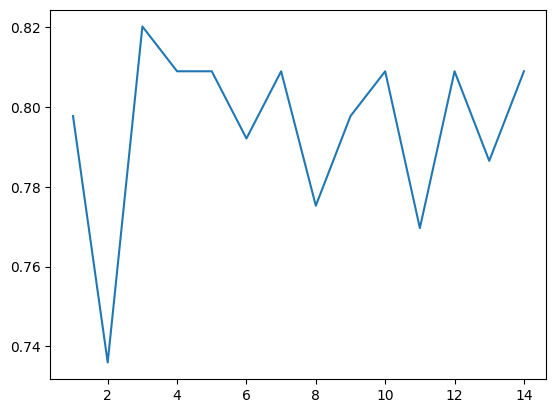

In [28]:
sb.lineplot(x=range(1, 15), y=results)

In [35]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

print('='* 100)

predictions_df = DataFrame(
	confusion_matrix(y_test, predictions),
	columns=["Predicted No", "Predicted Yes"],
	index=["Actual No", "Actual Yes"]
)
print(predictions_df)

print('='* 100)

print(classification_report(y_test, predictions))

0.8202247191011236
            Predicted No  Predicted Yes
Actual No             93             10
Actual Yes            22             53
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       103
           1       0.84      0.71      0.77        75

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178



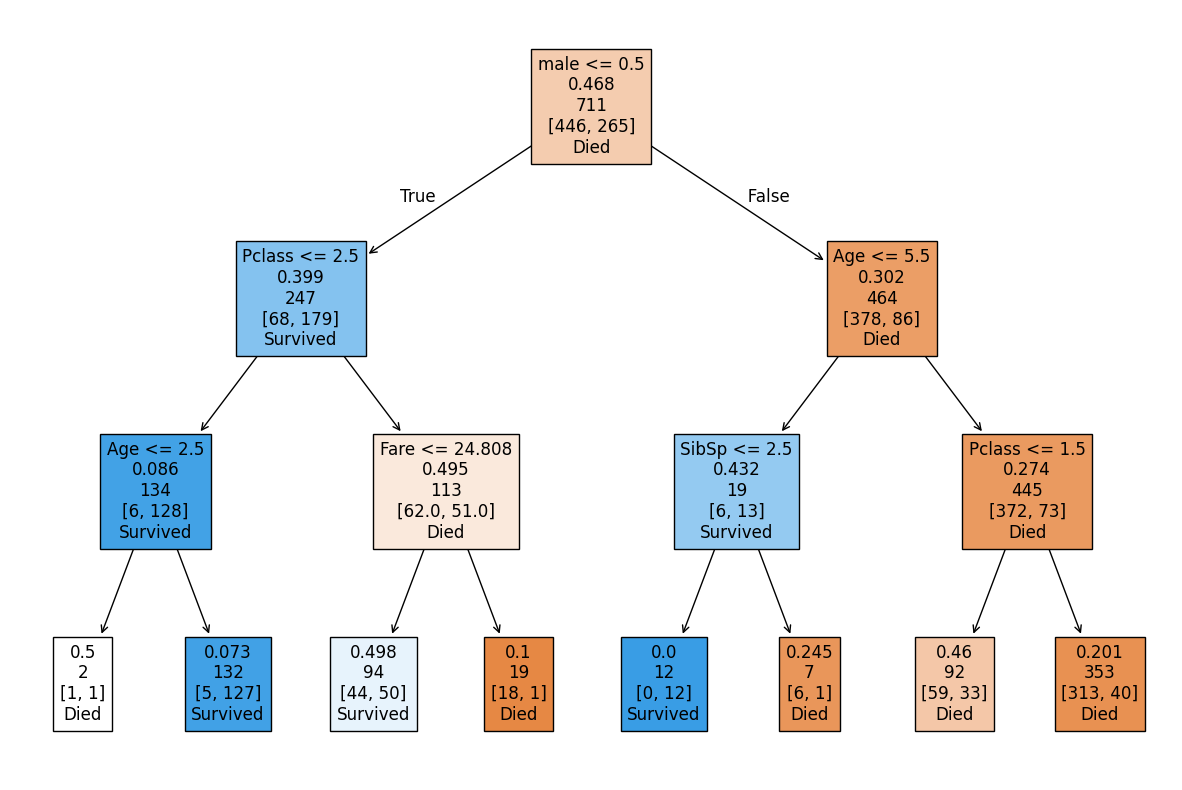

In [39]:
plt.figure(figsize=(15,10))
plot_tree(
	model,
	feature_names=x_train.columns,
	class_names=["Died", "Survived"],
	filled=True,
	label="none"
)
plt.show()